In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r'D:\Github\Datasets\power_plant.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


The objective is to build model that can predict power energy (PE) with input of features:
- AT = average temperature (C)
- V = exhaust vacuum (cmHg)
- AP = ambient pressure (milibar)
- RH = relative humidity (%)
- PE = power energy (Watt)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.duplicated().sum()

41

Duplicated values in technical measurement is common. So, it is not something error in the data.

In [5]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9527 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9527 non-null   float64
 1   V       9527 non-null   float64
 2   AP      9527 non-null   float64
 3   RH      9527 non-null   float64
 4   PE      9527 non-null   float64
dtypes: float64(5)
memory usage: 446.6 KB


In [6]:
df.describe()

,AT,V,AP,RH,PE
count,9527.000000,9527.000000,9527.000000,9527.000000,9527.00000
mean,19.658225,54.293421,1013.237084,73.334951,454.33591
std,7.444397,12.686309,5.940526,14.607513,17.03908
min,1.810000,25.360000,992.890000,25.560000,420.26000
25%,13.530000,41.740000,1009.085000,63.375000,439.75000
50%,20.350000,52.080000,1012.920000,75.000000,451.52000
75%,25.710000,66.510000,1017.200000,84.850000,468.36500
max,37.110000,81.560000,1033.300000,100.160000,495.76000


In [7]:
df.skew()
#if skewness is less than -1 or greater than 1 mean there are outliers

AT   -0.136107
V     0.196819
AP    0.273846
RH   -0.435138
PE    0.305791
dtype: float64

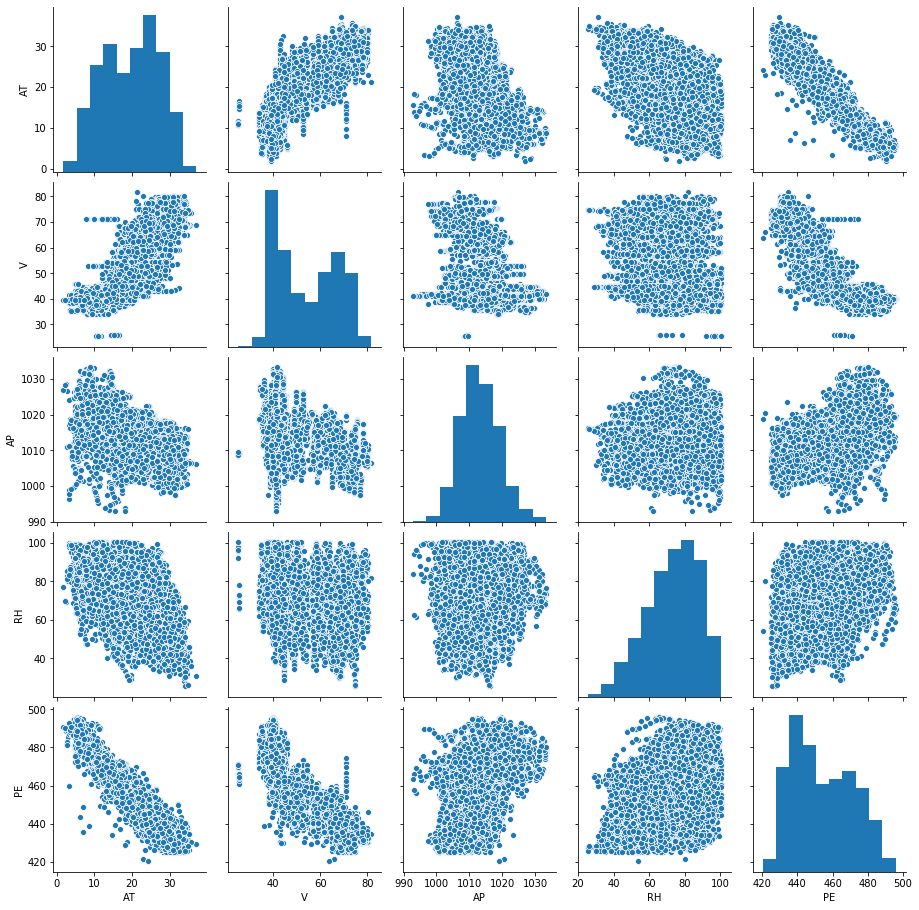

In [8]:
sns.pairplot(df)
plt.show()

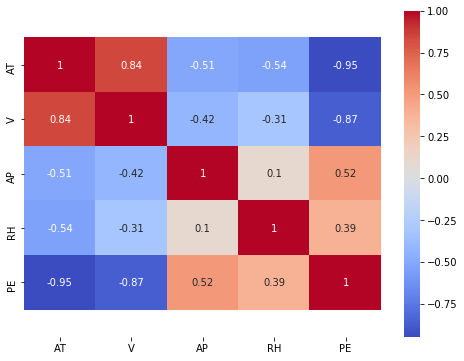

In [9]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
bot,top = ax.get_ylim()
ax.set_ylim(bot+0.5, top-0.5)
plt.show()

Linear correlation is ratio of covariance(x,y) with standard deviation of x and y; corr = cov(x,y)/(sx.sy)
- this is linear correlation map between all features and label (PE)
- rules:
    - -0.1<r<0.1: bad correlation
    - 0.1<r<0.5 and -0.5<r<-0.1 : good correlation
    - r>0.5 or r<-0.5 : very good correlation
- AT, V, and AP have very good correlation to PE
- RH has good correlation to PE

In [10]:
x = df.drop(['PE'],axis = 1)
y = df['PE']

### Hypothesis test

- Null hypothesis (H0): current business belief of the particular event
- Alternative hypothesis (Ha): an alternative belief that challenge H0

- To either accept or reject H0, we should determine confidence interval.
- It is like limit or boundaries whether to accept or reject the product.
- For example: desired volume of a dairy milk is 100 ml
- confidence interval = 95%
- confidence interval describe how confidence you are with current business. greater means you have high confidence, you belief that the business is good. if it is lower, it means you have greater doubts that the output wouldn't be as desired.
- significance = the rest from 95% = 5%
- pvalue is measurement of the closeness of average mean of data(x) to target(z)
- if pvalue of data is greater than 5%, then accept H0
- pvalue > significance : accept H0
- pvalue <= significance : reject H0
- mathematically, how do we obtain pvalue?

In [11]:
from statsmodels.stats.weightstats import ztest
zstat,pvalue = ztest([5],[3.1,2.5,3.1,2.9,4.2,3.9,4.2,4.5,3.7,2.5,2.3])
pvalue

0.04312168595261391

- H0: the data is close enough with desired target
- business confidence is 95% error tolerance (significance) is 5%
- desired target(z) = 5
- data to be tested are x = 3.1,2.5,3.1,2.9,4.2,3.9,4.2,4.5,3.7,2.5,2.3
- pvalue = 4.3%. if confidence interval is 95%. null hypothesis is rejected

### ANOVA

ANOVA = Analysis of variance – compare means / variation in two or more samples 

Sample1 – an array having data of age of customers who left the bank 

Sample2 – an array having data of age of customers who didn't leave the bank 

For ANOVA -  

Null Hypothesis – H0 = means of two samples are similar to each other 

Alternate Hypothesis – Ha = means of two samples are different each other 


If the business confidence is = 95% = 0.95 

Significance level = 5% = 0.05 


If pvalue > 0.05 = we accept the H0 (Null Hypothesis) = means of features are similar to each other = feature is not important

If pvalue <0.05 = we reject the H0 (Null Hypothesis) = means of features are different to each other = feature is important


In [12]:
from sklearn.feature_selection import f_regression
fvalue,pval = f_regression(x,y)

for i in range(len(x.columns)):
    print('pvalue of',x.columns[i],'=',pval[i])

pvalue of AT = 0.0
pvalue of V = 0.0
pvalue of AP = 0.0
pvalue of RH = 0.0


pvalues are lower than 0.05 all features are important

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=5)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print('m: ',model.coef_)
print('c: ',model.intercept_)

m:  [-1.97989179 -0.23382941  0.05726074 -0.15945546]
c:  459.67116944347623


### Performance Analysis
Metric that is used to measure the performance of linear regression should measure the closeness of predicted value to actual. It is called as R2 score, which came from Root mean square error (RMSE). Actually, it is the square root of difference between actual and predicted value. If max value of R2 is 1, it means the predicted value is 100% close to actual value.

E = 1/n*((sum((y-yhat)^2)))^1/2)

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test,model.predict(x_test))

0.9302847464353334

In [18]:
new_data = np.array([[8.34,40.77,1010.84,90.01]])
model.predict(new_data)

array([477.1545038])

### Exporting

In [16]:
import joblib
joblib.dump(model,'lr_powerplant.pkl')

['lr_powerplant.pkl']